#### This table lists out the repayment history of each of the loans that the applicant had with Home Credit Group. The table contains features like the amount of installment, how much did the client pay for each installments, etc.

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data installments payments

In [2]:
installments_payments = pd.read_csv('../DATA RAW/dseb63_installments_payments.csv')
installments_payments

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0


In [3]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
 7   SK_ID_CURR              float64
dtypes: float64(6), int64(2)
memory usage: 472.7 MB


- SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample
- SK_ID_CURR: ID of loan in our sample
- NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
- NUM_INSTALMENT_NUMBER : On which installment we observe payment (how much installment amount)
- DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application (installment date)
- DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually
- AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment
- AMT_PAYMENT: What the client actually paid on previous credit on this installment

#### Check duplicated, unique and null 

In [4]:
installments_payments.duplicated().sum()

0

In [5]:
installments_payments.nunique().sum()

2123825

In [6]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        1639
AMT_INSTALMENT               1
AMT_PAYMENT               1639
SK_ID_CURR                   1
dtype: int64

In [7]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(installments_payments)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

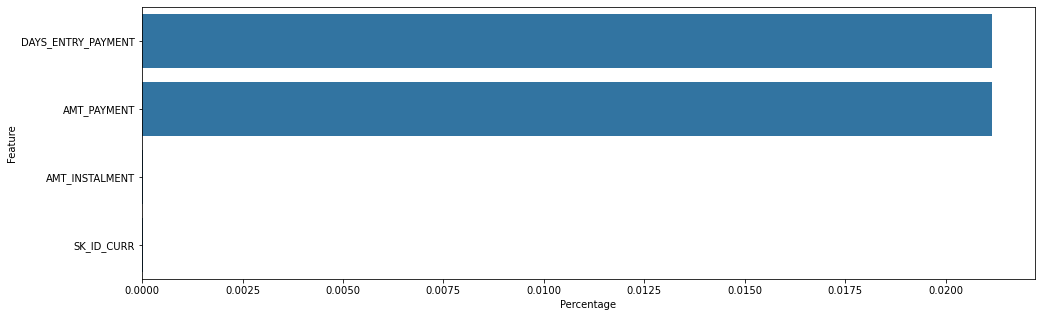

In [8]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

- There are only 2 columns which contain NaN values of the 8 columns from installments_payments.
- These columns also contain very minimal proportion of NaN values, i.e only 0.02%, so it is not of much concern.

#### Load data applicatiation train

In [9]:
application_train = pd.read_csv('../DATA RAW/dseb63_application_train.csv')
# Only keep the SK_ID_CURR column and target variable
application_train = application_train[['SK_ID_CURR', 'TARGET']]
application_train.head(10)

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,64140,0
4,219374,0
5,53466,0
6,27272,0
7,218056,0
8,52390,0
9,268198,0


#### Drop duplicated

In [10]:
installments_payments = installments_payments[~installments_payments['SK_ID_CURR'].duplicated(keep='first')]
application_train = application_train[~application_train['SK_ID_CURR'].duplicated(keep='first')]

#### Merge application_train to installments_payments table

In [11]:
# Create a new DataFrame from combining by column SK_ID_CURR
result_df = pd.merge(installments_payments, application_train, on='SK_ID_CURR', how='inner')
# result_df = pd.merge(application_train, installments_payments, how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
# result_df = pd.merge(application_train, installments_payments, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

# Reset the index to have a new DataFrame with the SK_ID_CURR column as the index column
result_df.reset_index(inplace=True)

In [12]:
result_df.head(20)

,index,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,TARGET
0,0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0,0
1,1,1330831,0.0,34,-2156.0,-2156.0,1716.525,1716.525,70226.0,0
2,2,2085231,2.0,1,-63.0,-63.0,25425.000,25425.000,56266.0,0
3,3,2452527,1.0,3,-2418.0,-2426.0,24350.130,24350.130,273159.0,0
4,4,2714724,1.0,2,-1383.0,-1366.0,2165.040,2160.585,235198.0,0
5,5,1137312,1.0,12,-1384.0,-1417.0,5970.375,5970.375,285719.0,0
6,6,2234264,4.0,11,-349.0,-352.0,29432.295,29432.295,65411.0,0
7,7,1818599,2.0,4,-968.0,-994.0,17862.165,17862.165,43612.0,0
8,8,1782554,1.0,3,-933.0,-937.0,34620.525,34620.525,85360.0,0
9,9,2558880,1.0,8,-1262.0,-1269.0,15031.080,15031.080,104947.0,0


In [13]:
print(result_df.shape)
result_df.dtypes

(144408, 10)


index                       int64
SK_ID_PREV                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
SK_ID_CURR                float64
TARGET                      int64
dtype: object

In [14]:
result_df_1 = result_df.copy()

In [15]:
# Check for null values
result_df_1.isnull().sum()

index                     0
SK_ID_PREV                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        1
AMT_INSTALMENT            0
AMT_PAYMENT               1
SK_ID_CURR                0
TARGET                    0
dtype: int64

#### Handling Nan value

In [16]:
result_df_1.fillna(result_df_1.median(), inplace=True)
result_df_1

,index,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,TARGET
0,0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0,0
1,1,1330831,0.0,34,-2156.0,-2156.0,1716.525,1716.525,70226.0,0
2,2,2085231,2.0,1,-63.0,-63.0,25425.000,25425.000,56266.0,0
3,3,2452527,1.0,3,-2418.0,-2426.0,24350.130,24350.130,273159.0,0
4,4,2714724,1.0,2,-1383.0,-1366.0,2165.040,2160.585,235198.0,0
...,...,...,...,...,...,...,...,...,...,...
144403,144403,1963503,1.0,5,-2497.0,-2555.0,31325.985,31325.985,7593.0,0
144404,144404,2599856,1.0,9,-870.0,-847.0,16355.880,52.920,72892.0,0
144405,144405,1437320,1.0,7,-1963.0,-1963.0,4846.140,4846.140,66054.0,0
144406,144406,1670184,1.0,9,-99.0,-98.0,7186.455,7186.455,143631.0,0


In [17]:
# Check for null values
result_df_1.isnull().sum()

index                     0
SK_ID_PREV                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
SK_ID_CURR                0
TARGET                    0
dtype: int64

#### Correlation chart between features with TARGET

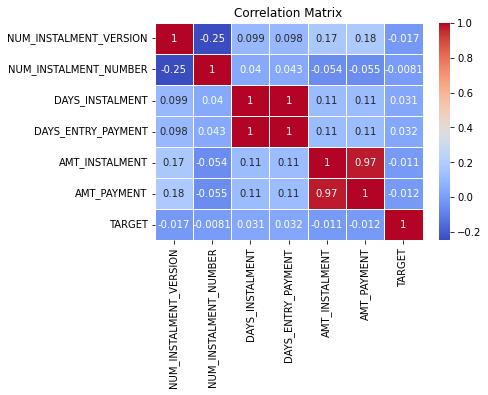

In [18]:
correlation_matrix = result_df_1[['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT','TARGET']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### The heatmap above shows the correlation between each feature in installments_payments table with the rest of the features.
- Từ bản đồ nhiệt của ma trận tương quan, chúng ta thấy một vài tính năng tương quan cao. Đó là:
- AMT_INSTALMENT và AMT_PAYMENT
- DAYS_INSTALMENT và DAYS_ENTRY_PAYMENT
- Hai bộ tính năng tương quan này là dễ hiểu, vì chúng thực sự là các tính năng về thời điểm trả góp đến hạn thanh toán so với thời điểm thanh toán và cả số tiền đến hạn so với số tiền đã trả.
- Các tính năng này sẽ hữu ích cho việc tạo các bộ tính năng hoàn toàn không tương quan mới.
- Mối tương quan của các tính năng với Target không đáng chú ý, điều này cho thấy sự vắng mặt của mối quan hệ tuyến tính giữa tính năng và biến đích.

#### Draw a box plot for continuous variables 

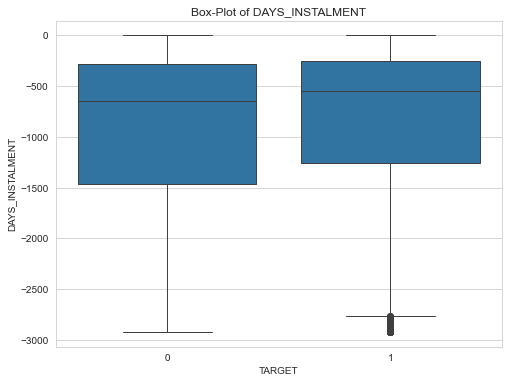

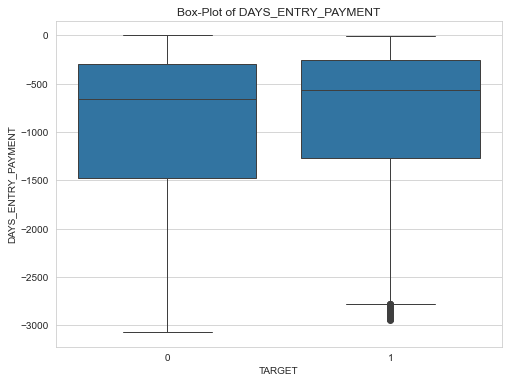

In [19]:
def plot_continuous_variables(data, column_name, plots=['distplot', 'CDF', 'box', 'violin'], scale_limits=None, figsize=(8, 6), histogram=True, log_scale=False):
    data_to_plot = data.copy()
    
    if scale_limits:
        # Taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')

    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)

        if ele == 'CDF':
            # Making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by=column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0) - 1) for ele in range(len(percentile_values_0))]

            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by=column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1) - 1) for ele in range(len(percentile_values_1))]

            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color='red', label='Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color='black', label='Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize='medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')

        if ele == 'distplot':
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist=False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist=False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

columns_to_plot = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT']

for column in columns_to_plot:
    plot_continuous_variables(result_df_1, column, plots=['box'], log_scale=False)

#### DAYS_INSTALMENT
- Cột này liệt kê những ngày mà khoản trả góp của tín dụng trước đó sẽ được thanh toán.
#### DAYS_ENTRY_PAYMENT 
- Cột này liệt kê những ngày mà khoản trả góp của tín dụng trước đó đã thực sự được thanh toán.
#### Summary:
Từ 2 biểu đồ trên, chúng ta có thể thấy Defaulters có xu hướng có số ngày ít hơn kể từ lần thanh toán cuối cùng của họ, trong khi Non-defaulters có nhiều ngày hơn kể từ lần thanh toán cuối cùng của họ. Tất cả các quantiles của Defaulters đều có số ngày gần đây hơn so với Non-defaulters. Do đó, Non-defaulters thường có nhiều khoảng cách hơn trong các khoản thanh toán của họ kể từ ngày nộp đơn so với Defaulters. Điều này có thể cho thấy rằng Defaulters đang gặp khó khăn trong việc thanh toán các khoản nợ của họ đúng hạn.